<a href="https://colab.research.google.com/github/maggiecrowner/labs_fork/blob/main/4LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Lab - Maggie Crowner

In [5]:
! git clone https://github.com/DS3001/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 66 (delta 20), reused 11 (delta 11), pack-reused 37 (from 1)
Receiving objects: 100% (66/66), 2.64 MiB | 7.87 MiB/s, done.
Resolving deltas: 100% (22/22), done.


## Question 1

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/linearRegression/data/Q1_clean.csv")
display(df)

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt
...,...,...,...,...,...
22148,90,100.0,Manhattan,Apartment,Entire home/apt
22149,65,80.0,Brooklyn,Apartment,Private room
22150,55,100.0,Brooklyn,Loft,Shared room
22151,60,100.0,Brooklyn,Apartment,Private room


###Part 1

In [9]:
price_by_neighborhood = df.groupby('Neighbourhood ')['Price'].mean()
print(price_by_neighborhood)
score_by_neighborhood = df.groupby('Neighbourhood ')['Review Scores Rating'].mean()
print(score_by_neighborhood)

Neighbourhood 
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
Name: Price, dtype: float64
Neighbourhood 
Bronx            91.654378
Brooklyn         92.363497
Manhattan        91.801496
Queens           91.549057
Staten Island    90.843750
Name: Review Scores Rating, dtype: float64


Manhattan is the most expensive borough on average.

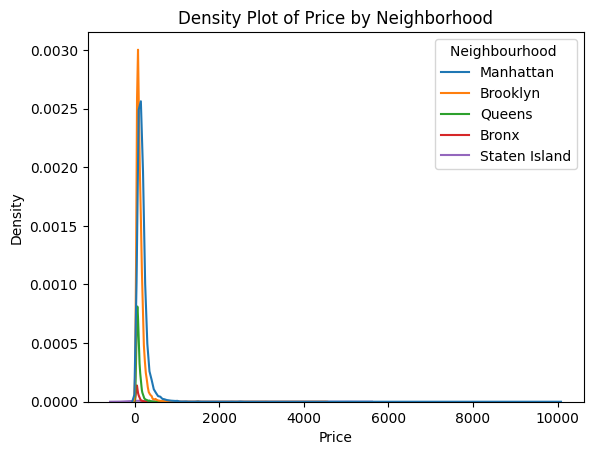

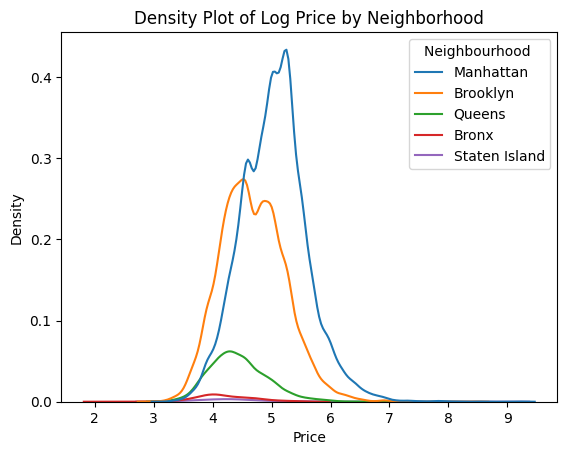

In [16]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.title('Density Plot of Price by Neighborhood')
plt.show()
sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.title('Density Plot of Log Price by Neighborhood')
plt.show()

###Part 2

In [25]:
y = df['Price']
x = pd.get_dummies(df['Neighbourhood '], dtype=int)

lm = linear_model.LinearRegression(fit_intercept=False).fit(x,y)
results = pd.DataFrame({'Borough':lm.feature_names_in_,
                        'Coefficient':lm.coef_})
print(results)

         Borough  Coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667


The coefficients in the linear regression model are equal to the means in the previous part for each borough. This makes sense, and will be true of any continuous variable on one categorical variable broken up into dummy variables, because there are no other predictors or terms in the model.

###Part 3

In [30]:
y = df['Price']
x = pd.get_dummies(df['Neighbourhood '], dtype=int, drop_first=True)

lm = linear_model.LinearRegression(fit_intercept=True).fit(x,y)
results = pd.DataFrame({'Borough':lm.feature_names_in_,
                        'Coefficient':lm.coef_})
print(results)
print('Intercept: ', lm.intercept_)

         Borough  Coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169
Intercept:  75.27649769585331


In order to perform this regression while keeping the intercept, we have to drop a dummy variable and make it a reference variable. This is typically done with dummy variables to make them binary. Thus, each coefficient is now different from the original means because it's in comparison to the reference variable, the Bronx. The intercept, then, is equal to the coefficient of the reference variable, since there are still no other terms than these in the model. If you add together the intercept and a given coefficient, it will return the mean from part 1.

###Part 4

In [38]:
y = df['Price']
x = df.loc[:,['Review Scores Rating', 'Neighbourhood ']]
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.2,
                                                    random_state=1)
X_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
X_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

lm = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)
y_hat = lm.predict(X_test)
print('R^2: ', lm.score(X_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)
results = pd.DataFrame({'Predictor': lm.feature_names_in_, 'Coefficient': lm.coef_})
results

R^2:  0.02999848788561521
RMSE:  205.53757661645776


,Predictor,Coefficient
0,Review Scores Rating,1.051788
1,Bronx,-18.983421
2,Brooklyn,30.215533
3,Manhattan,85.367332
4,Queens,1.149659
5,Staten Island,59.309491


The R^2 value is 0.0299, which means that 2.99% of the variation can be attributed to the response variable. The root mean squared error value is 205.538, which is very high and means that the model is not a good fit for the data. The coefficient of Review Scores Rating is 1.0518. The most expensive property you can rent is a place with a score of 100 in Manhattan.

###Part 5

In [40]:
y = df['Price']
x = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.2,
                                                    random_state=100)

X_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
X_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
lm = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)
y_hat = lm.predict(X_test)
print('R^2: ', lm.score(X_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)
results = pd.DataFrame({'Variable': lm.feature_names_in_, 'Coefficient': lm.coef_})
results

R^2:  0.22035348129282306
RMSE:  114.27692123130633


,Variable,Coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


The R^2 value is 0.2204, which means that 22.04% of the variation can be attributed to the response variable. The root mean squared error value is 114.277, which is very high and means that the model is not a good fit for the data. The coefficient of Review Scores Rating is 0.6269. The most expensive property you can rent is an entire home/apt with a score of 100 in Manhattan.

###Part 6

With more predictors in the model as in part 5, some of the variation will be attributed to room type. This means that review scores rating will have less influence on the outcome, and therefore, a lower coefficient. You can also see that room type has some pretty high coefficients, which means that it is a very influential variable in the model.

## Question 3

###Part 1

In [7]:
df = pd.read_csv("/content/linearRegression/data/pretrial_data.csv")
df['held'] = df['held_wo_bail'].astype(int)
df = df[['held', 'race', 'sex', 'is_poor', 'prior_F', 'case_type']]
df = df.dropna()
display(df)

,held,race,sex,is_poor,prior_F,case_type
3,0,B,M,0.0,0.0,M
4,0,W,F,0.0,0.0,F
5,0,B,M,0.0,1.0,M
6,0,B,F,1.0,0.0,F
7,0,B,M,0.0,0.0,M
...,...,...,...,...,...,...
22980,0,W,M,0.0,1.0,M
22981,0,B,M,1.0,12.0,M
22983,0,B,M,1.0,6.0,M
22984,0,B,F,0.0,1.0,M


###Part 2

In [8]:
df['Black'] = (df['race']=='B').astype(int)
df = df[['held', 'Black', 'sex', 'is_poor', 'prior_F', 'case_type']]
display(df)

,held,Black,sex,is_poor,prior_F,case_type
3,0,1,M,0.0,0.0,M
4,0,0,F,0.0,0.0,F
5,0,1,M,0.0,1.0,M
6,0,1,F,1.0,0.0,F
7,0,1,M,0.0,0.0,M
...,...,...,...,...,...,...
22980,0,0,M,0.0,1.0,M
22981,0,1,M,1.0,12.0,M
22983,0,1,M,1.0,6.0,M
22984,0,1,F,0.0,1.0,M


###Part 3

In [9]:
x = pd.DataFrame(df['Black'])
y = pd.DataFrame(df['held'])
lm = linear_model.LinearRegression(fit_intercept=True).fit(x,y)
print('Black:', lm.coef_, '\n',
      'Intercept:', lm.intercept_, '\n',
      'R^2:', lm.score(x,y))

Black: [[0.06652667]] 
 Intercept: [0.23887476] 
 R^2: 0.005488899261788305


If the person is not black, they are 23.89% likely to be held without bail. If the person is black, they are 6.65% more likely than a person who is not black. The R^2 value is 0.0055, meaning that 0.55% of the variation in the model can be attributed to the independent variable.

###Part 4

In [10]:
# held on Black and sex
df['sex'] = df['sex'].replace(['M','F'],['Male','Female'])
sex_dummy_vars = pd.get_dummies(df['sex'], dtype='int', drop_first=True)
y = df['held']
x = pd.concat([df['Black'], sex_dummy_vars], axis=1)
lm = linear_model.LinearRegression(fit_intercept=True).fit(x,y)
print(pd.DataFrame({'Variable': x.columns, 'Coefficient':lm.coef_}))

  Variable  Coefficient
0    Black     0.061118
1     Male     0.101826


In [11]:
# held on Black and sex and is_poor
x = pd.concat([df['is_poor'], x], axis=1)
lm = linear_model.LinearRegression(fit_intercept=True).fit(x,y)
print(pd.DataFrame({'Variable': x.columns, 'Coefficient':lm.coef_}))

  Variable  Coefficient
0  is_poor     0.185503
1    Black     0.034525
2     Male     0.115318


In [12]:
# held on Black and sex and is_poor and prior_F
x = pd.concat([df['prior_F'], x], axis=1)
lm = linear_model.LinearRegression(fit_intercept=True).fit(x,y)
print(pd.DataFrame({'Variable': x.columns, 'Coefficient':lm.coef_}))

  Variable  Coefficient
0  prior_F     0.026246
1  is_poor     0.167517
2    Black     0.024879
3     Male     0.098066


In [13]:
# held on Black and sex and is_poor and prior_F and case_type
case_dummy_vars = pd.get_dummies(df['case_type'], dtype='int', drop_first=True)
x = pd.concat([case_dummy_vars, x], axis=1)
lm = linear_model.LinearRegression(fit_intercept=True).fit(x,y)
print(pd.DataFrame({'Variable': x.columns, 'Coefficient':lm.coef_}))

  Variable  Coefficient
0        I    -0.508882
1        M    -0.421528
2        S    -0.137768
3  prior_F     0.016397
4  is_poor     0.073426
5    Black     0.018460
6     Male     0.084721


The coefficient for the 'Black' variable decreases as you add more predictors to the model. This is because these other predictors are the cause of some of the variation in the response variable, so they will take some of the weight in determining a prediction. Therefore, whether or not the person is black will matter less and less with more predictors in the model.

###Part 5

In [16]:
df['BlackXsex'] = df['Black'].replace([0,1],['NotBlack','Black'])+'X'+df['sex']
x = pd.get_dummies(df['BlackXsex'],dtype=int)
lm = linear_model.LinearRegression(fit_intercept=False).fit(x,y)
print(pd.DataFrame({'Variable': x.columns, 'Coefficient':lm.coef_}))

          Variable  Coefficient
0     BlackXFemale     0.174618
1       BlackXMale     0.347722
2  NotBlackXFemale     0.198398
3    NotBlackXMale     0.256024


Since these are the only terms in the model, the coefficients just show the probability of a category of person being held without bail, not controlling for any other factors. It is interesting that black women have the lowest probability of being held without bail, even lower than non-black women. It is not that surprising to me that black men have the highest probability of being held without bail, given history and biases in the system.

###Part 6

I don't think judges should be making bail decisions based on models. I think decisions like these cannot be so black and white and must be more case-by-case based. To turn something so complex and unique into a numbers game doesn't seem fair. Also, using models means we're basing decisions on the past, so it doesn't give us a way to move forward and evolve as a society. I generally think that models cannot ever really fully explain such a complex issue the way a human could.